# TLC e Teste de Hipótese

___


___
Carregando algumas bibliotecas:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
import math

# Para ter melhor print
from IPython.display import display

___
## Índice

- [Questão 1 - Black Friday: o perfil do comprador online brasileiro](#q1) 
    - [Item a](#q1_a)
    - [Item b](#q1_b)
    - [Item c](#q1_c)
- [Questão 2 - Pressão Arterial](#q2) 
    - [Item a](#q2_a)
    - [Item b](#q2_b)
    - [Item c](#q2_c)
- [Questão 3 - Ticket Médio](#q3) 
    - [Item a](#q3_a)
    - [Item b](#q3_b)
    - [Item c](#q3_c)
- [Questão 4 - Seguro Saúdo](#q4) 
    - [Item a](#q4_a)
    - [Item b](#q4_b)
    - [Item c](#q4_c)
    - [Item d](#q4_d)
- [Questão 5 - Exame de Sangue - Hipoglicemia Crônica](#q5) 
    - [Item a](#q5_a)
    - [Item b](#q5_b)
    - [Item c](#q5_c)
    - [Item d](#q5_d)
    - [Item e](#q5_e)
- [Questão 6 - Roubos de Smartphones](#q6) 
    - [Item a](#q6_a)
    - [Item b](#q6_b)
- [Questão 7 - Loja de Departamento Marvak](#q7) 
    - [Item a](#q7_a)
    - [Item b](#q7_b)
    - [Item c](#q7_c)
    - [Item d](#q7_d)
- [Questão 8 - Informações Climáticas](#q8) 
    - [Item a](#q8_a)
    - [Item b](#q8_b)
- [Questão 9 - Lobos Cinzentos](#q9) 
    - [Item a](#q9_a)
    - [Item b](#q9_b)
    - [Item c](#q9_c)

<div id="q1"></div>

# Questão 1



### Black Friday: o perfil do comprador online brasileiro

<img src="questao3.jpg">

Fonte: https://veja.abril.com.br/tecnologia/black-friday-o-perfil-do-comprador-online-brasileiro/

**PROBLEMA**

Em 2019, o gasto médio dos brasileiros com compras on-lines na Black Friday foi igual a 503 reais. Ainda, o desvio padrão populacional desse gasto foi igual a 100 reais.

Neste ano, muita especulação foi feita sobre as vendas na Black Friday. Algumas empresas de pesquisa de mercado suspeitam que o gasto médio irá superar a do ano anterior.

Assim, as hipóteses em termos do problema e em termos do parâmetro são:

$H_0:$ Suspeita da empresa de pesquisa de mercado não procede $\hspace{3mm}\Rightarrow\qquad H_0: \mu \leq 503$

$H_A:$ Suspeita da empresa de pesquisa de mercado procede   $\hspace{9mm}\Rightarrow\qquad H_0: \mu > 503$

<br>

Uma amostra de 49 compras on-lines em 2020 serão analisadas. Assuma que o desvio padrão dos gastos na Black Friday de 2020 manterá o mesmo de 2019.

Considerando um nível de significância de $5\%$, responda:

---

<div id="q1_a"></div>

**a)** Utilizando uma técnica inferencial adequada, encontre a região crítica do teste.

In [3]:
n = 49
sigma = 100
alpha = 0.05

rc = stats.norm.ppf(0.95, loc=503, scale=sigma/(n ** 0.5))
print(f"Região Crítica: {rc:.4f}")



Região Crítica: 526.4979


**Para itens b) e c)**

Assuma que após a Black Friday de 2020, o gasto médio amostral observado em 49 compras on-lines foi igual a $530,00$ reais.

---

<div id="q1_b"></div>


**b)** Considerando item anterior, tome uma conclusão em termos do problema, deixando claro quais resultados foram utilizados para tal decisão. 

    Como 530 > 526.49 (região crítica), rejeitamos H_0. Ou seja, rejeitamos a suspeita da empresa de que a pesquisa não procede.

---

<div id="q1_c"></div>


**c)** Calcule o valor-p e responda se há evidências de que a suspeita das empresas de pesquisa procede, com $5\%$ de nível de significância.

In [4]:
p_value = 1 - stats.norm.cdf(530, loc=503, scale=sigma/(n ** 0.5))
print(f"p-value: {p_value:.4f}")

p-value: 0.0294


    Novamente, rejeitamos H_0

___

<div id="q2"></div>

# Questão 2

## Pressão Arterial


<img src="questao4.jpg">

Fonte: https://melhorcomsaude.com.br/5-formas-naturais-diminuir-pressao-arterial/



A base de dados `blood_pressure` apresentada [aqui](https://github.com/Opensourcefordatascience/Data-sets/find/master) contém a pressão arterial de cada um dos $120$ pacientes antes de um tratamento (`bp_before`) e depois esse tratamento (`bp_after`).

Essa base de dados está representada no arquivo `blood_pressure.xlsx`:

In [5]:
# Carregando os dados
bp = pd.read_excel("blood_pressure.xlsx")
bp.head(5)

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


**PROBLEMA**

O objetivo é avaliar se o tratamento foi eficaz na redução da pressão arterial desses pacientes. 

Para isso, deve-se avaliar se, em média, a diferença entre a pressão arterial depois e antes do tratamento é inferior a zero.

Levando em consideração a variável `diferenca` calculada a seguir, verifique se há evidências suficiente para afirmar que o tratamento foi eficaz quanto a redução, em média, da pressão arterial, com $99\%$ de coeficiente de confiança.

In [6]:
diferenca = bp["bp_after"] - bp["bp_before"]
diferenca.head(5).to_frame()

,0
0,10
1,7
2,15
3,-11
4,-5


Assim, as hipóteses em termos do problema e em termos do parâmetro são:

$H_0:$ O tratamento não foi eficaz $\hspace{3mm}\Rightarrow\qquad H_0: \mu_{\text{diferença}} \geq 0$

$H_A:$ O tratamento foi eficaz   $\hspace{9mm}\Rightarrow\qquad H_0: \mu_{\text{diferença}} < 0$

sendo $\mu_{\text{diferença}}$ a média populacional da variável diferença entre a pressão arterial depois e antes.



Responda:

---

<div id="q2_a"></div>

**a)** Utilizando uma técnica inferencial adequada, calcule o valor-p do teste. 

In [7]:
# como só temos um df (espaço amostral), podemos usar o t-student
n = len(diferenca)
sigma = np.std(diferenca)
x = np.mean(diferenca) 
t_obs = (x - 0) / (sigma / n ** 0.5)

p_value = stats.t.cdf(t_obs, df=n-1)
print(f"p-value: {p_value:.5f}")

p-value: 0.00054


---

<div id="q2_b"></div>

**b)** Considerando item anterior, tome uma conclusão em termos do problema, deixando claro quais resultados foram utilizados para tal decisão. 

    Como o p-value é menor que o nível de significância (1%), rejeitamos H0 e concluímos que o tratamento foi eficaz.

---

<div id="q2_c"></div>

**c)** Utilizando uma técnica inferencial adequada, encontre a região crítica deste teste.

In [8]:
tc = stats.t.ppf(0.01, df=n-1)
print(f"Região Crítica: {tc:.4f}")

Região Crítica: -2.3581


___

<div id="q3"></div>

# Questão 3


## [Ticket médio: por que esse indicador é tão importante para sua empresa?](https://www.organicadigital.com/blog/ticket-medio-por-que-esse-indicador-e-tao-importante/)

"Para ter uma boa gestão do negócio, é muito importante mensurar os resultados com os indicadores de desempenho, também conhecidos como KPIs (Key Performance Indicator).

O **ticket médio** é um dos KPIs mais importantes de um negócio, pois fornece ao gestor informações valiosas para a elaboração de ações estratégicas e para o planejamento de vendas com o objetivo de melhorar os resultados. O ticket médio mensal é calculado, por exemplo, por:

$\qquad\Rightarrow$ Ticket médio mensal $=$ faturamento total mensal $/$ número de pedidos mensal"
   


**PROBLEMA**

Assuma que o ticket médio mensal de uma franquia de doces era igual a 75 reais, com desvio padrão populacional igual a 27 reais.

Segundo a reportagem apresentada [aqui](https://www.organicadigital.com/blog/ticket-medio-por-que-esse-indicador-e-tao-importante/), oferta de combos de produtos é uma opção para aumentar o ticket médio mensal de uma empresa, ou seja, oferecer descontos na compra de um determinado mix de itens.

Com essa orientação, a franquia de doces pretende analisar se esse mix de itens oferecido aos clientes refletiu no aumento do ticket médio mensal quando comparado com histórico.

Assim, as hipóteses em termos do problema e em termos do parâmetro são:

$H_0:$ Oferta de combo de produtos não foi eficaz $\hspace{3mm}\Rightarrow\qquad H_0: \mu \leq 75$

$H_A:$ Oferta de combo de produtos foi eficaz   $\hspace{9mm}\Rightarrow\qquad H_0: \mu > 75$

<br>

Nesse experimento, foi considerada uma amostra de 16 filiais dessa franquia de doces com a suposição de que o desvio padrão populacional não será afetado pela oferta do combo de produtos.

Considerando um nível de significância de $1\%$, responda:

---

<div id="q3_a"></div>

**a)** Utilizando uma técnica inferencial adequada, encontre a região crítica do teste.

In [9]:
sigma = 27
n = 16

rc = stats.norm.ppf(0.99, loc=75, scale=sigma/(n ** 0.5))

print(f"Região Crítica: {rc:.5f}")

Região Crítica: 90.70285


**Para itens b) e c)**

Assuma que com a oferta desse combo de produtos, a média amostral do ticket médio mensal foi igual a $88,50$ reais.

---

<div id="q3_b"></div>

**b)** Considerando item anterior, tome uma conclusão em termos do problema, deixando claro quais resultados foram utilizados para tal decisão. 

    Não há evidências para rejeitar H0, visto que a média amostral é menor que a região crítica.

---

<div id="q3_c"></div>


**c)** Calcule o valor-p e responda se há evidências de que a suspeita das empresas de pesquisa procede, com $1\%$ de nível de significância.

In [10]:
p = 1- stats.norm.cdf(88.5, loc=75, scale=sigma/(n ** 0.5))
print(f"p-value: {p:.5f}")

p-value: 0.02275


    Como o p-value é maior que o nível de significância (1%), não há evidências que possam rejeitar H0. Ou seja, as suspeitas da empresa não se concretizaram e nãio pode-se dizer que a oferta foi eficaz.

<div id="q4"></div>

___

# Questão 4


## Conjunto de Dados: Seguro Saúde

<img src="./doctor.jpg" width=100% alt="Fonte: https://atchealthcarerhr.com/wp-content/uploads/2018/08/iStock-695218436-e1534801414819.jpg"> </img>

O arquivo `insurance.csv` possui dados de custos médicos individuais cobrados por seguro de saúde. Esta base foi disponibilizada por [Miri Choi](https://www.kaggle.com/mirichoi0218/insurance) no Kaggle.

As variáveis contidas no *dataset* são:

- `age`: idade do beneficiário;
- `sex`: gênero do beneficiário;
- `bmi`: índice de massa corporal (IMC) em $kg/m^2$;
- `children`: número de crianças/dependentes cobertos pelo seguro;
- `smoker`: fumante;
- `region`: área residencial do beneficiário (nos EUA);
- `charges`: custos médicos individuais.

Vamos começar carregando os dados.

In [11]:
dados = pd.read_csv('insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

Sabe-se que em 2018 o índice de massa corporal (IMC) médio da população masculina dos EUA era $30,5 kg/m^2$. Admita que os dados contidos no arquivo `insurance.csv` foram coletados de uma amostra aleatória da população dos EUA. Baseado nesses dados, queremos descobrir se o IMC médio da população masculina aumentou. 

<br>

**Responda:**

---

<div id="q4_a"></div>

**a)** Formule as hipóteses em termos do problema e em termos estatísticos.

    H0 -> u <= 30.5
    H1 -> u > 30.5

---

<div id="q4_b"></div>

**b)** Faça o teste de hipóteses utilizando uma técnica adequada. Considere nível de significância de 5%. Tome a decisão via região crítica.

In [12]:
homens = dados[dados["sex"] == "male"]

n = len(homens)
sigma = np.std(homens["bmi"])
x = np.mean(homens["bmi"]) 
t_obs = (x - 30.5) / (sigma / n ** 0.5)
print(f"t-obs: {t_obs:.4f}")

tc = stats.t.ppf(1- 0.05, df=n-1)
print(f"Região Crítica: {tc:.4f}")

if t_obs < tc:
    print("Não rejeito H0")
else:
    print("Rejeito H0")

t-obs: 1.8777
Região Crítica: 1.6471
Rejeito H0


---

<div id="q4_c"></div>

**c)** Repita o teste de hipóteses, agora tomando a decisão via valor-*p*.

In [13]:
p_value = 1 - stats.t.cdf(t_obs, df=n-1)
print(f"p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Rejeito H0")
else:
    print("Não rejeito H0")

p-value: 0.03043
Rejeito H0


---

<div id="q4_d"></div>

**d)** Verifique graficamente se a distribuição da variável `bmi` é normal, considerando o contexto desta questão. Explique: a normalidade da variável `bmi` é relevante para a sua escolha de técnica no teste de hipóteses dos itens **b** e **c**?

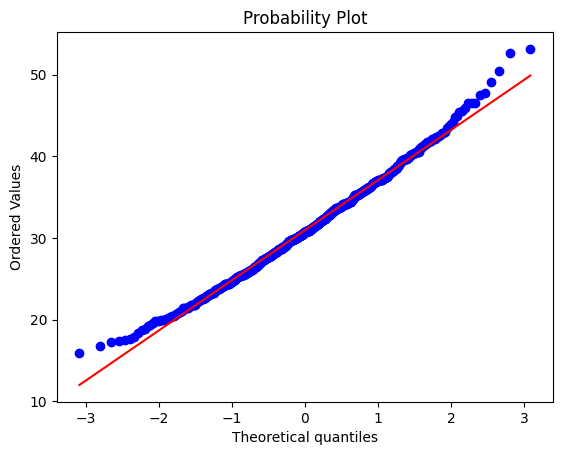

In [14]:
stats.probplot(homens['bmi'], dist="norm", plot=plt);

---

<div id="q5"></div>

# Questão 5
## Exame de Sangue - Hipoglicemia Crônica


<img src="glucosemonitor.png" width=33%>

A população em geral tem glicose no sangue seguindo uma curva normal com $\mu_0 = 90$ e $\sigma_0=8$

Pessoas que sofrem com hipoglicemia crônica têm curva normal com $\mu_1=75$ e $\sigma_1=8$


Foi realizado um exame de sangue um certo número de elementos de amostra e adotou-se $\alpha=1\%$

Assuma tamanho da amostra como n=9


Nota: parâmetros de saúde ficcionais usados para fins de ilustração

Pede-se:

As hipóteses nula e alternativa para o exame de sangue que detecta se a pessoa não tem ou tem hipoglicemia crônica foram, respectivamente, elaboradas da seguinte forma:

$H_0: \mu=90$

$H_1: \mu < 90$

---

<div id="q5_a"></div>

**a.** Encontre o $\bar{x}_{crítico}$ para o teste com o nível de significância dado 

In [15]:
n = 9
sigma = 8

rc = stats.norm.ppf(0.01, loc=90, scale=sigma/(n ** 0.5))
print(f"Região Crítica: {rc:.5f}")

Região Crítica: 83.79641


---

<div id="q5_b"></div>


**b.** Foi coletado o exame de sangue de um indivíduo e dividido em $n=9$ frascos, o que rendeu a amostra a seguir. Calcule o valor p deste teste 

In [16]:
amostra = [82.00, 79.41, 83.04, 83.21, 82.67, 79.96, 85.75, 82.6 , 84.19]

In [17]:
p_value = stats.norm.cdf(np.mean(amostra), loc=90, scale=sigma/(n ** 0.5))
print(f"p-value: {p_value:.5f}")

p-value: 0.00257


---

<div id="q5_c"></div>


**c.** Usando os insumos acima conclua o teste. A conclusão que se chega pelo $x_{cr
itico}$ concorda com a solução encontrada via valor p? 

    X crítico e valor p não rejeitam H0

---

<div id="q5_d"></div>


**d.** Diga o que significa, em termos do problema, um erro do tipo 2 neste caso

    Um erro tipo 2 se dá quando H0 não é rejeitado, embora ele seja falso (falso negativo).
    Nesse sentido, significa considerar uma pessoa com glicemia normal uma pessoa com hiperglicemia crônica.

---

<div id="q5_e"></div>


**e.** Qual a probabilidade $\beta$ de um erro do Tipo 2 neste caso?

In [18]:
1 - stats.norm.cdf(rc, loc=75, scale=sigma/(n ** 0.5))

0.0004857511189776398

___

<div id="q6"></div>

# Questão 6

## Roubos de Smartphones

Com os smartphones cada vez mais presentes em nossas vidas, estes passaram a ser visados por criminosos. No ano de 2018, nos transportes públicos da cidade de São Paulo, o número médio de smartphones roubados diariamente foi de 526, com um desvio padrão associado de 90. 

Com o intuito de reduzir os roubos de smartphones, o governo determinou que as operadoras de transporte colocassem cartazes em pontos estratégicos com dicas para que os passageiros pudessem evitar os roubos de seus aparelhos dentro do transporte público. Após o início da campanha, em uma amostra de 33 dias, observou-se uma média amostral de 494 smartphones roubados diariamente. Suponha que a variabilidade do número de smartphones roubados diariamente após a campanha do governo seja a mesma do ano de 2018.

---

<div id="q6_a"></div>

**a)** Admitindo que outros fatores relevantes não sofreram alterações entre os períodos analisados, realize um teste de hipóteses para avaliar se há evidências de que a campanha do governo tenha sido eficaz. 

**Escolha adequadamente** uma das metodologias vistas no curso e faça:

> i. Construa as hipóteses nula e alternativa em termos do problema e em termos do parâmetro. 

> ii. Construa a Região Crítica do teste de hipóteses assumindo $\alpha =0.05$ e faça uma conclusão em termos do problema.

> iii. Calcule o valor_p e faça novamente uma conclusão em termos do problema. 


**Resposta:**

In [19]:
mu = 526
sigma = 90
n = 33
m_amostral = 494

# hipótese nula: mu = 526
# hipótese alternativa: mu < 526

rc = stats.norm.ppf(0.05, loc=mu, scale=sigma/(n ** 0.5))
print(f"Região Crítica: {rc:.5f}")

if m_amostral > rc:
    print("Não rejeito H0")
else:
    print("Rejeito H0")

p_value = stats.norm.cdf(m_amostral, loc=mu, scale=sigma/(n ** 0.5))
print(f"p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Rejeito H0")
else:
    print("Não rejeito H0")

Região Crítica: 500.23010
Rejeito H0
p-value: 0.02055
Rejeito H0


<div id="q6_b"></div>

---

**b)** Suponha que o verdadeiro número médio de smartphones roubados diariamente caiu para 480 após a campanha do governo. Usando a regra de decisão obtida no item (A), qual a probabilidade de se concluir que a campanha não foi eficaz? 

**Resposta:**

In [20]:
μ1=480
1-stats.norm.cdf(rc, loc=μ1, scale=sigma/np.sqrt(n))

0.09830743173785272

---

<div id="q7"></div>

# Questão 7
## Loja de Departamento Marvak


A Marvak, uma renomada loja de departamentos, decidiu realizar uma pesquisa para verificar uma possível associação entre algumas características de seus clientes com seus gastos anuais na loja.

Dessa forma, foi selecionada aleatoriamente uma amostra aleatória de $1.000$ clientes que já fizeram compra na Marvak em todas as filiais no último ano e foram observadas as seguintes informações:

* **IDADE**: idade do cliente, que foi categorizada em jovem (até 30 anos), adulto (de 31 a 55 anos) ou idoso (56 ou mais anos);
* **SEXO**: sexo do cliente (feminino ou masculino);
* **RESIDENCIA**: tipo de residência do cliente (alugada ou própria);
* **EC**: estado civil do cliente (casado ou solteiro);
* **SALARIO_ANUAL**: salário anual do cliente (em reais); e
* **GASTO_ANUAL**: gasto total anual do cliente em compras realizadas na Marvak (em reais).


In [21]:
dados = pd.read_excel("Marvak.xlsx")

In [22]:
dados.head()

,ID,IDADE,SEXO,RESIDENCIA,EC,SALARIO_ANUAL,GASTO_ANUAL
0,1,Jovem,Feminino,Alugada,Solteiro,86000.00,1053.00
1,2,Jovem,Feminino,Propria,Casado,48543.74,321.03
2,3,Jovem,Feminino,Propria,Solteiro,14760.10,375.03
3,4,Adulto,Feminino,Alugada,Solteiro,19900.00,262.00
4,5,Idoso,Masculino,Alugada,Casado,119000.00,278.00


In [23]:
dados.columns

Index(['ID', 'IDADE', 'SEXO', 'RESIDENCIA', 'EC', 'SALARIO_ANUAL',
       'GASTO_ANUAL'],
      dtype='object')

In [24]:
dados.IDADE = dados.IDADE.astype('category')
dados.SEXO = dados.SEXO.astype('category')
dados.RESIDENCIA = dados.RESIDENCIA.astype('category')
dados.EC = dados.EC.astype('category')

In [25]:
dados.dtypes

ID                  int64
IDADE            category
SEXO             category
RESIDENCIA       category
EC               category
SALARIO_ANUAL     float64
GASTO_ANUAL       float64
dtype: object

## Problema

O departamento financeiro da Marvak acredita que os clientes de qualquer filial dessa rede gastaram, em média, mais do que $510$ reais no último ano.

Levando em consideração a amostra disponível na base de dados, verifique se há evidências suficiente para afirmar que a suspeita do departamento financeiro procede.

---

<div id="q7_a"></div>

**a)** Construção das Hipóteses Nula e Alternativa em termos do problema e do parâmetro. 

**R.:**

In [ ]:
# Hipótese nula: mu <= 510
# Hipótese alternativa: mu > 510

---

<div id="q7_b"></div>

**b)** Cálculo do valor *p* do teste.

**R.:**

In [32]:
# não sabemos sigma, então usamos t-student

med = np.mean(dados.GASTO_ANUAL)
sigma = np.std(dados.GASTO_ANUAL)
n = len(dados.GASTO_ANUAL)
t_obs = (med - 510) / (sigma / n ** 0.5)

p_value = 1 - stats.t.cdf(t_obs, df=n-1)
print(f"p-value: {p_value:.5f}")

p-value: 0.03643


---

<div id="q7_c"></div>

**c)** Conclusão em termos do problema, deixando claro quais resultados foram utilizados para tal decisão. 

**R.:**

    Não há evidências para rejeitar a hipótese nula com significância de 1%, visto que o p-value > 0.01

---

<div id="q7_d"></div>

**d)** Qual ou quais suposições foram feitas para a escolha da distribuição utilizada no item **(b)** desta questão. Se há suposição para a distribuição de probabilidades da variáveis de interesse, verifique-a de utilizando algum recurso gráfico. 

**R.:**

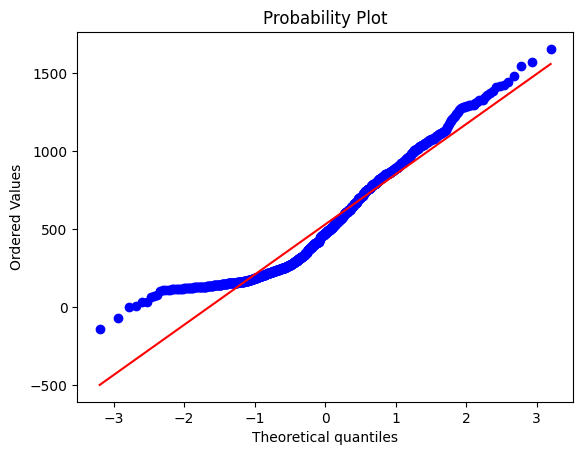

In [35]:
stats.probplot(dados.GASTO_ANUAL, dist="norm", plot=plt);

---

<div id="q8"></div>

# Questão 8
## Informações Climáticas

<img src=chuva_av_paulista.png width=25% alt="Fonte: https://www.flickr.com/photos/8759505@N03/8291327440">



### Dados

O arquivo de dados, em csv, contém algumas informações climáticas de uma região da Hungria, Szeged, as quais foram mensuradas de hora em hora / diariamente entre 2006 e 2016. 

Essa base foi extraída no [link](https://www.kaggle.com/budincsevity/szeged-weather/data) da Kaggle, cujo objetivo é comparar a *temperatura histórica real* com a *temperatura decorrente de sabedoria/tradição popular* (em inglês, [weather folklore](https://www.naturalnavigator.com/the-library/weather-lore/)).

Algumas das variáveis contidas no *dataset* original **considerando apenas os momentos com chuvisco** são:

* `Formatted Date`: data e hora da temperatura
* `Temperature (C)`: temperatura real, a qual representa a *temperatura histórica real*
* `Apparent Temperature (C)`: temperatura aparente, a qual representa a *temperatura decorrente de sabedoria popular* 
* `Humidity`: umidade
* `Wind Speed (km/h)`: velocidade do vento
* `Visibility (km)`: visibilidade


In [36]:
df1 = pd.read_csv("weatherAF.csv")

In [37]:
df1.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,2012-04-12 10:00:00.000 +0200,14.716667,14.716667,0.59,24.7940,11.1090
1,2012-04-14 13:00:00.000 +0200,12.922222,12.922222,0.89,7.4865,11.1090
2,2012-04-14 15:00:00.000 +0200,13.833333,13.833333,0.78,8.7101,8.2110
3,2012-04-17 16:00:00.000 +0200,7.805556,5.155556,0.90,15.4882,10.6743
4,2012-05-26 16:00:00.000 +0200,17.844444,17.844444,0.58,14.4256,11.1573


In [38]:
df1.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Visibility (km)'],
      dtype='object')

___

Nesta questão, a ideia é avaliar se, em média, há diferença significativa entre as temperaturas real e aparente considerando apenas os momentos com chuvisco.

O primeiro passo é criar coluna no *dataframe* `df1` que contenha a diferença entre as variáveis `Temperature (C)` e	`Apparent Temperature (C)`. Dê o nome a essa coluna de `DifTemp`.

In [40]:
#Cria coluna diferença das temperaturas
df1['DifTemp'] = df1['Temperature (C)'] - df1['Apparent Temperature (C)']

In [41]:
df1[['Temperature (C)', 'Apparent Temperature (C)', 'DifTemp']].head()

,Temperature (C),Apparent Temperature (C),DifTemp
0,14.716667,14.716667,0.00
1,12.922222,12.922222,0.00
2,13.833333,13.833333,0.00
3,7.805556,5.155556,2.65
4,17.844444,17.844444,0.00


Agora **responda os itens a seguir**: 

---

<div id="q8_a"></div>

**a)** Conforme descrito inicialmente o objetivo é avaliar se, em média, existe diferença  não nula entre a temperatura real e a temperatura aparente nos momentos com chuvisco. 

Assim, assumindo que $\mu$ seja a verdadeira média dessa diferença, tem-se as seguintes hipóteses:

$H_0: \mu=0 \rightarrow $ Não há diferença entre as temperaturas real e aparente nos momentos seco 

$H_1: \mu\neq0 \rightarrow $ Há diferença entre as temperaturas real e aparente nos momentos seco

Escolha uma técnica adequada para testar as hipóteses descritas acima e faça o teste de hipóteses.

Considere nível de significância de 5%. Deixe clara sua conclusão.

**R.:**

---

In [42]:
# Vamos usar a distribuição t-student, visto que não conhecemos o valor de sigma

t_obs = np.mean(df1['DifTemp']) / (np.std(df1['DifTemp']) / np.sqrt(len(df1['DifTemp'])))
tc = stats.t.ppf(1 - (0.05/2), df=len(df1['DifTemp'])-1)

if abs(t_obs) > tc:
    print("Rejeito H0")
else:
    print("Não rejeito H0")


Rejeito H0


---

<div id="q8_b"></div>


**b)** Qual ou quais suposições foram feitas para a escolha da técnica utilizada no item anterior desta questão?

**R.:** Que a diferença de temperatura segue uma distribuição normal.

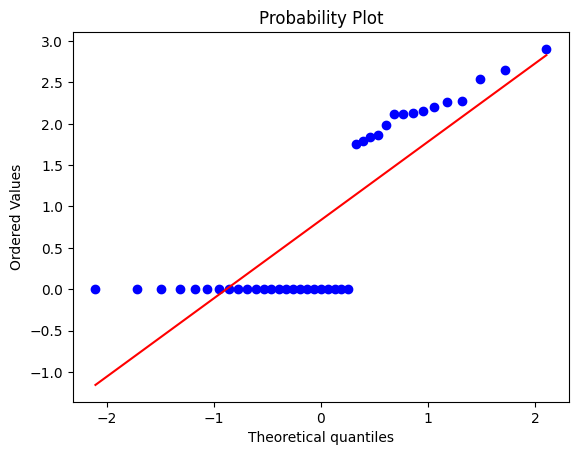

In [43]:
stats.probplot(df1['DifTemp'], dist="norm", plot=plt);

___

<div id="q9"></div>

# Questão 9
## Lobos Cinzentos

<img src="coywolf.png" alt="Fonte: https://www.youtube.com/watch?v=nNWCDpW6T4c" width="200">


Você é o biólogo chefe de uma reserva ambiental que tem, entre outros animais, lobos cinzentos. 

De acordo com as regulações de seu país, os animais da fauna nativa original do país devem ser protegidos.

Sabe-se que em regiões próximas à sua área os lobos têm cruzado com coiotes. O cruzamento entre lobo e  coiote gera um animal híbrido chamado  *coywolf*. Um *coywolf* se adapta melhor perto de populações humanas, mas não é da fauna original, portanto não tem proteção garantida por lei. 


Os lobos são maiores e mais pesados que os *coywolves*, sabe-se que antes da suspeita de hibridização a população de lobos de sua reserva era normalmente distribuída com peso médio de $37.5 kg$ e desvio padrão de $14.0$.

Você pesou alguns animais escolhidos aleatoriamente e chegou aos seguintes valores.

In [44]:
animais = [16.0, 41.2, 41.7, 30.1, 13.3, 22.3, 32.5, 33.4, 25.6, 18.8, 31.0, 24.5]

Olhando para essa lista de pesos, você suspeita que os animais estão leves demais em relação ao que se conhecia anteriormente. Será que houve hibridização? Deseja-se saber se a média de peso dos lobos da reserva diminuiu, ou seja: se há indicios de ter realmente ocorrido hibridização. Neste exercício você deverá montar e concluir o teste de hipóteses com um nível de significância de $2\%$ seguindo as etapas:

---

<div id="q9_a"></div>

**a.** Escreva a hipótese nula e a hipótese alternativa (pode ser em português, sem notação matemática) 

Símbolos úteis (se precisar e quiser usar) $H_0$ $H_1$ $\mu$ $>$ $<$ $\leq$ $\geq$ $\neq$

$H_0$ $\geq$ $37.5kg$

$H_1$ $<$ $37.5kg$

---

<div id="q9_b"></div>

**b.** Calcule os valores necessários e conclua o teste. Deixe claro em que se baseou sua conclusão e o que decidiu sobre as hipóteses

In [46]:
p_value = stats.norm.cdf(np.mean(animais), loc=37.5, scale=14/np.sqrt(len(animais)))
print(f"p-value: {p_value:.5f}")

if p_value < 0.02:
    print("Rejeito H0")
else:
    print("Não rejeito H0")

p-value: 0.00683
Rejeito H0


---

<div id="q9_c"></div>

**c.** No caso particular da hibridização dos lobos da reserva, interprete o que significa cometer um erro do tipo 1. Também indique qual é a probabilidade de cometer um erro do tipo 1 neste problema 

In [48]:
# Um erro tipo 1 acontece quando rejeitamos H0, mesmo ele sendo verdadeiro. Ou seja, seria classificar um lobo
# como um coywolf. O erro tipo 1 é chamado de erro alfa.

# o erro tipo 1 é igual ao nível de significância, ou seja, 2%.

0.023851764341508486